# cluster
### 1) k_means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [100]:
data = 'https://raw.githubusercontent.com/erfanyou/machine_learning_with_python_jadi/refs/heads/main/Cust_Segmentation.csv'
k_df = pd.read_csv(data)

In [101]:
k_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [102]:
k_df.info()
k_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


missing data
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64


unique values
[ 6.3 12.8 20.9  7.2 10.9  1.6  6.6 15.5  4.   6.1  6.5 17.6  9.4  9.2
  2.5 10.6 10.8  4.2 13.  19.8  8.4 17.3  8.8  2.6 13.5  2.4 10.1 15.
  3.9 10.   7.7  5.4 12.9  4.4  6.8  9.7 12.  23.8  5.9 21.3 13.1 17.5
  3.5  4.1  6.2  5.5 32.5 24.4  3.3 19.9 12.6  4.8  6.  13.7 15.4 11.2
 13.4  3.7  8.  10.5 14.7 16.1  2.8  1.9  7.9 12.2 29.7  9.1  8.2 18.4
 18.6  2.2  0.9  1.2 14.8  4.7 25.4  9.  13.2 30.1  2.9 14.4  3.   5.7
  9.5 16.   9.8 10.7  8.1 18.2 11.5  8.3  5.   1.7  3.4  4.5 13.9 11.
 16.4  8.7 11.8 25.1 10.3 23.4  9.3 17.2  5.6 17.1 14.6 19.2  0.8  2.7
 14.3 12.3 28.9  5.1 12.4 25.3 26.3 26.   7.   8.9  1.1 20.3 24.5  0.1
  4.6 13.8  3.1  3.6  1.  17.8 23.3 12.1  2.1 12.5  5.8  6.7  4.9 14.1
 24.6 17.  16.9 12.7

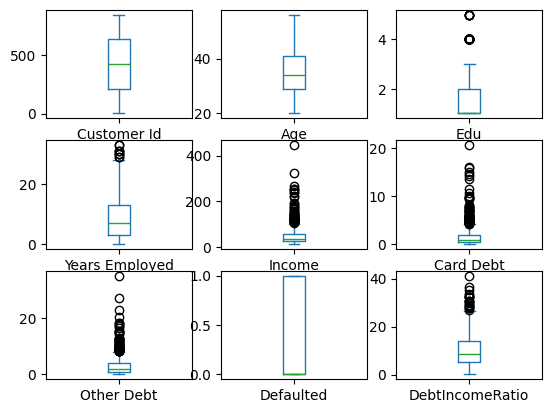

In [103]:
print('missing data')
missing_data = k_df.isnull().sum()
print(missing_data)

print('\n'*1)
print('unique values')
for i in k_df.columns:
    unique_values = k_df[i].unique()
print(unique_values)

print('\n'*1)
print('duplicates data')
duplicates = k_df.duplicated()
print(duplicates.sum())

print('\n'*1)
k_df.dtypes

print('\n')
k_df.plot( kind='box', subplots=True , layout= (3,3) , sharex=False , sharey=False)
plt.show()

In [104]:
from sklearn.preprocessing import StandardScaler
k_df=k_df.drop(['Address'] , axis=1)
X = k_df.values[:,1:]
X = np.nan_to_num(X)
x_s = StandardScaler().fit_transform(X)
x=pd.DataFrame(x_s , columns=k_df.columns[1:])


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Edu'}>,
        <Axes: title={'center': 'Years Employed'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Card Debt'}>,
        <Axes: title={'center': 'Other Debt'}>],
       [<Axes: title={'center': 'Defaulted'}>,
        <Axes: title={'center': 'DebtIncomeRatio'}>, <Axes: >]],
      dtype=object)

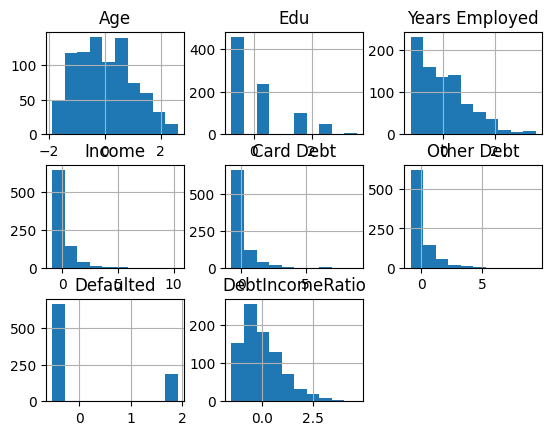

In [105]:
x.hist()

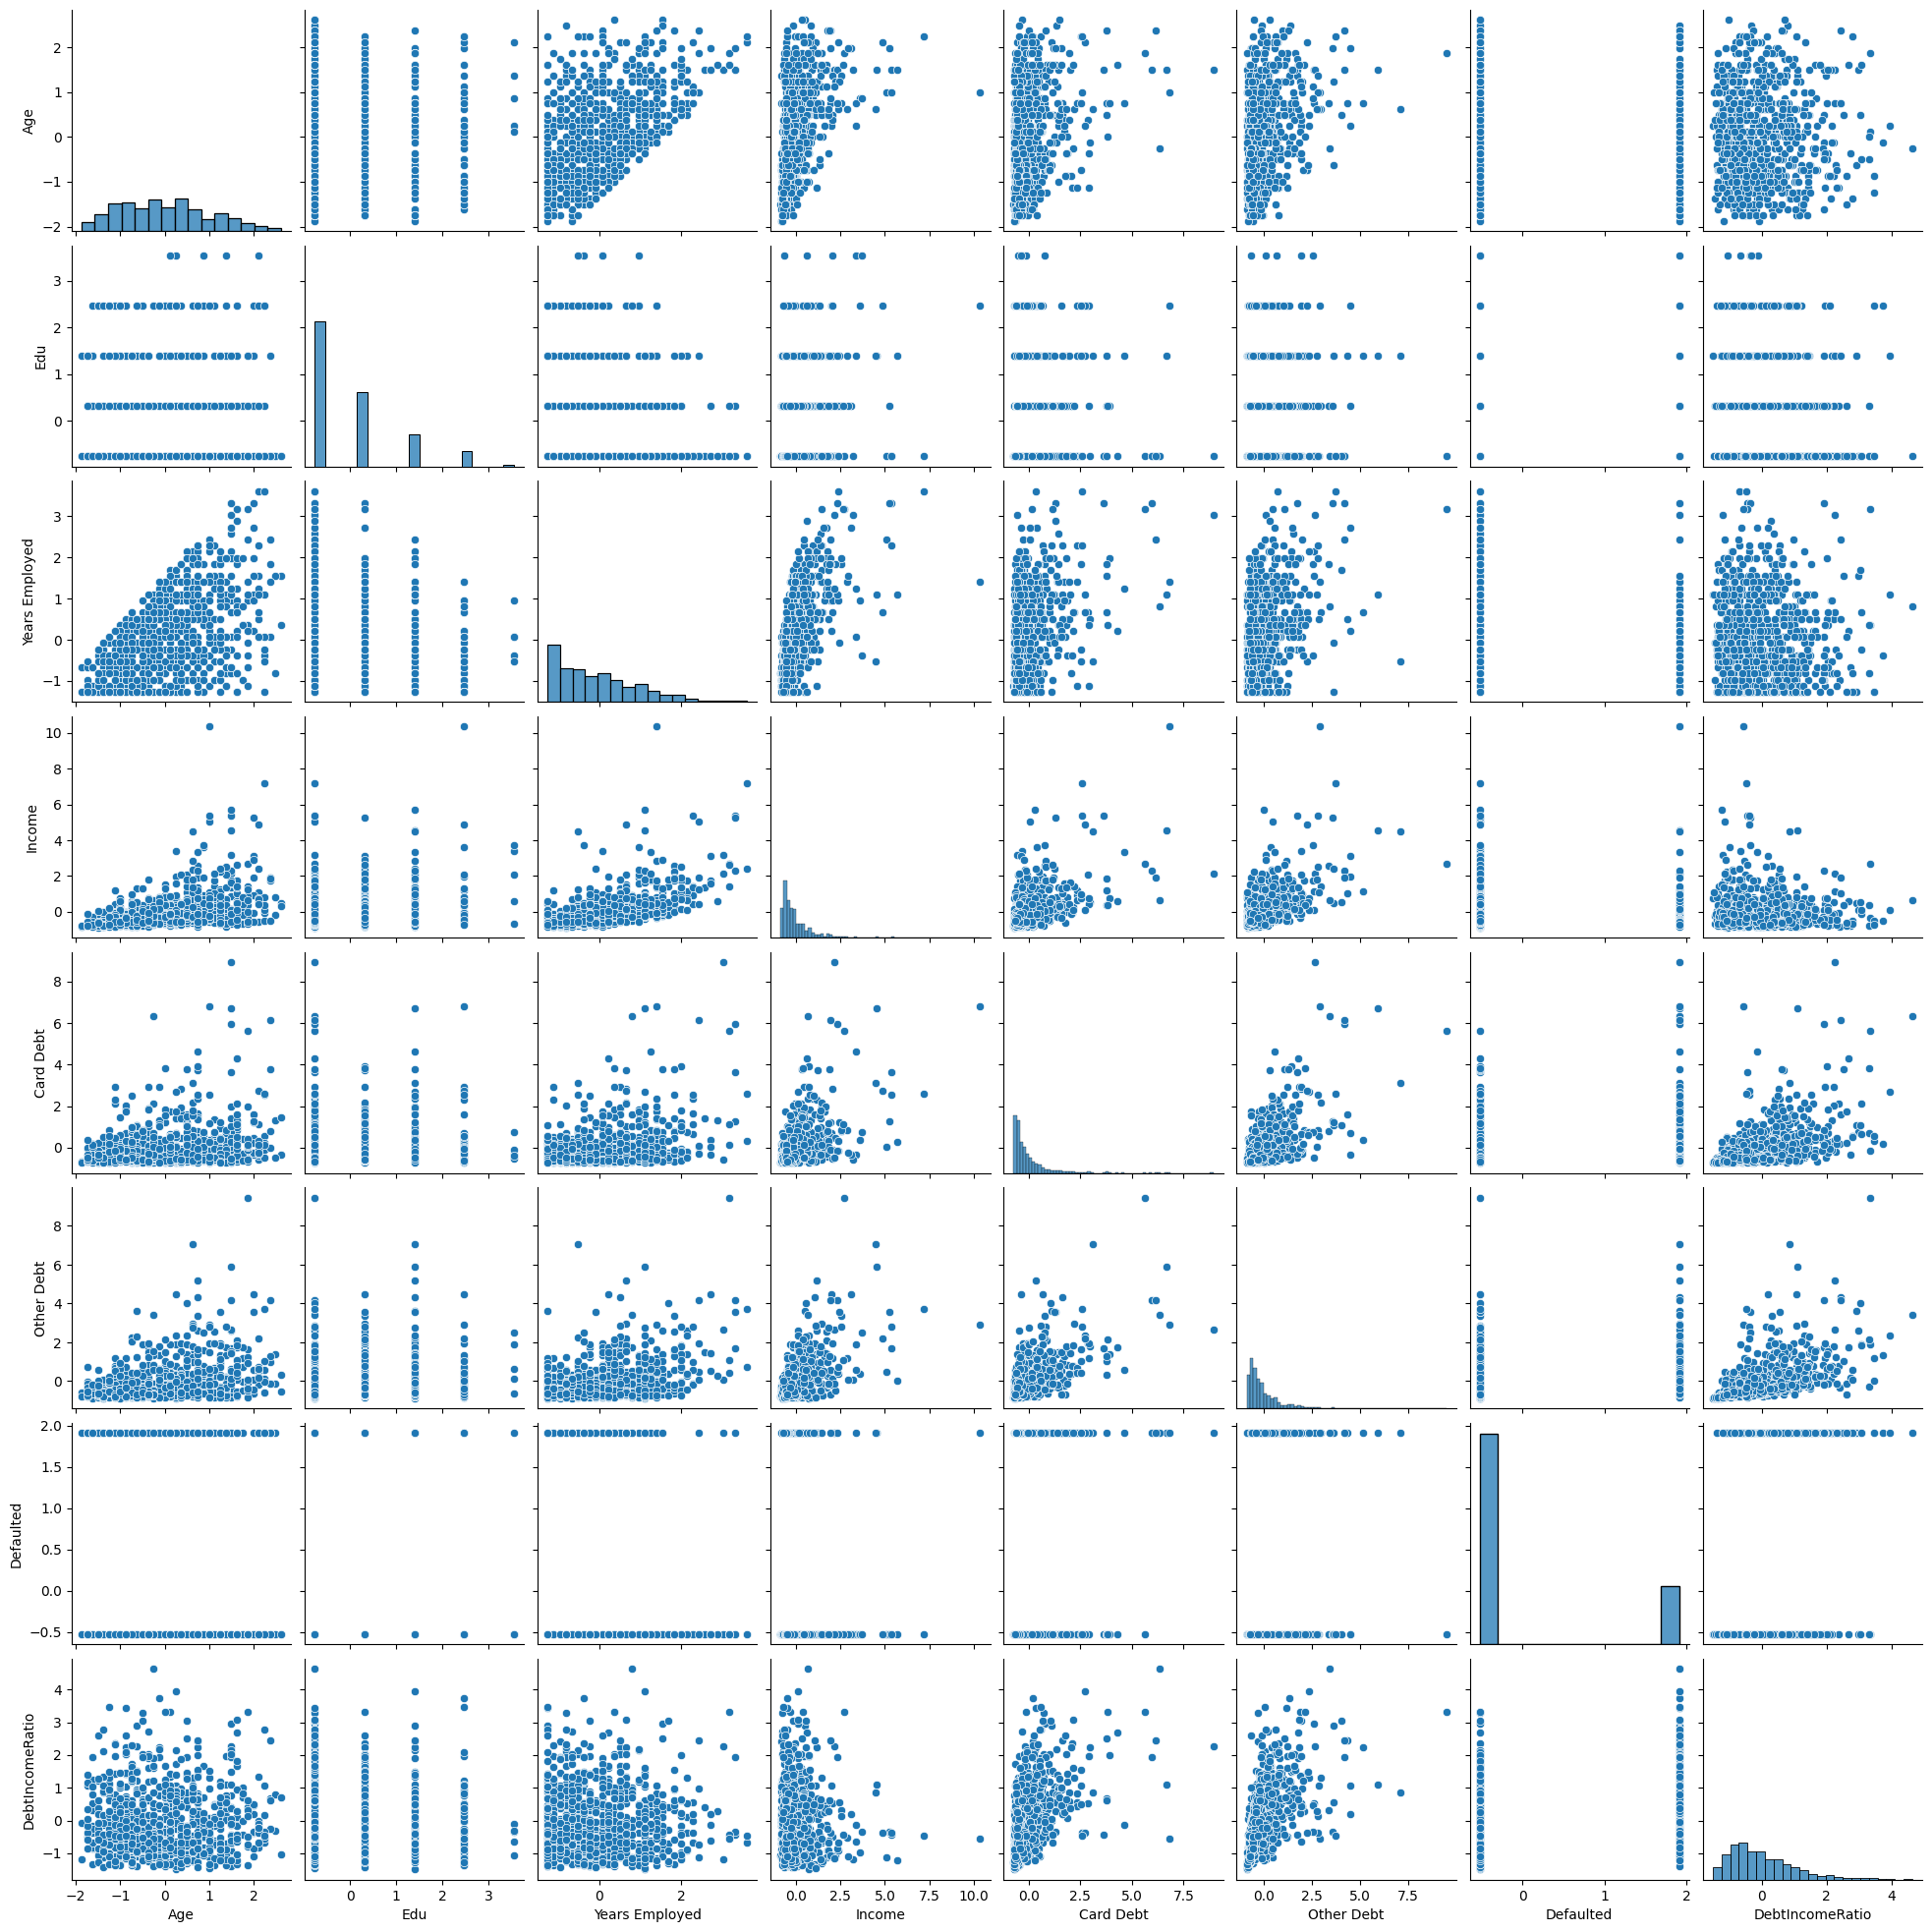

In [106]:
sns.pairplot(x)

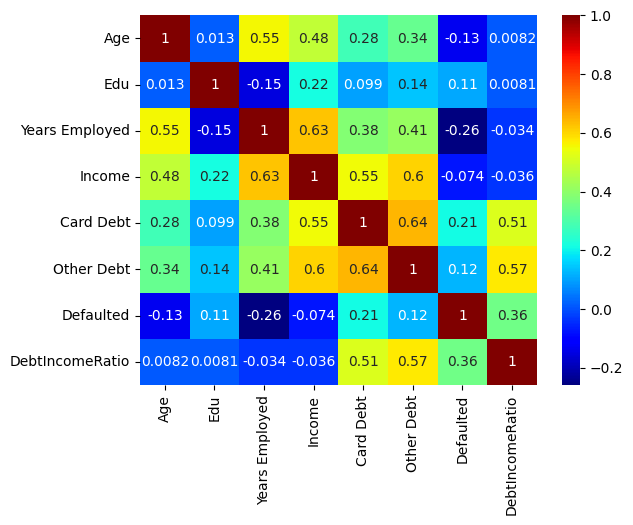

In [107]:
correlation = x.corr()

sns.heatmap(data=correlation , annot=True, cmap='jet')
plt.show()

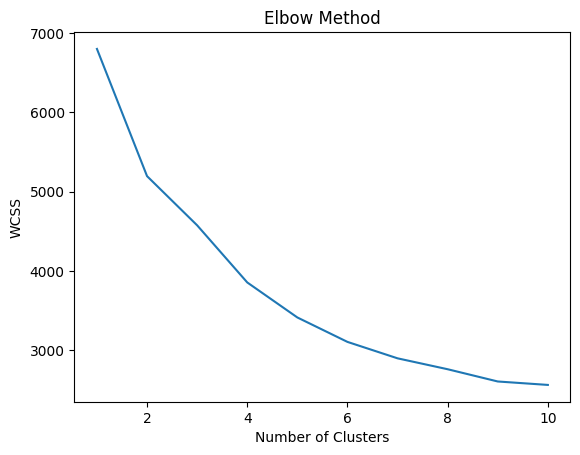

In [108]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [124]:
from sklearn.cluster import KMeans
from collections import Counter

km = KMeans(n_clusters=9 , init='k-means++' , max_iter=300 , n_init=10 , random_state=0)
km.fit(x_s)

labels = km.labels_

y_means = km.predict(x_s)

counter = Counter(y_means)

for element, count in counter.items():
    print(f"عنصر {element} تعداد {count} بار آمده است.")

عنصر 4 تعداد 177 بار آمده است.
عنصر 3 تعداد 61 بار آمده است.
عنصر 2 تعداد 65 بار آمده است.
عنصر 5 تعداد 228 بار آمده است.
عنصر 1 تعداد 13 بار آمده است.
عنصر 0 تعداد 81 بار آمده است.
عنصر 7 تعداد 103 بار آمده است.
عنصر 8 تعداد 88 بار آمده است.
عنصر 6 تعداد 34 بار آمده است.


In [125]:
k_df["Clus_km"] = labels
k_df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,4
1,2,47,1,26,100,4.582,8.218,0.0,12.8,3
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,5
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [126]:
k_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,423.395062,34.049383,3.444444,5.320988,42.172840,1.031210,2.197975,0.015873,8.253086
1,414.846154,45.846154,1.769231,23.384615,211.538462,12.072462,16.671308,0.800000,17.523077
2,431.169231,36.723077,2.000000,6.753846,42.969231,3.327446,5.321108,1.000000,21.218462
3,393.393443,45.295082,1.704918,20.573770,106.049180,2.050000,4.291902,0.000000,6.591803
4,435.734463,39.932203,1.288136,10.638418,42.988701,0.776186,1.666085,0.020690,6.024859
5,432.675439,28.732456,1.307018,4.925439,26.500000,0.610307,1.397079,0.000000,7.802193
6,439.882353,42.176471,2.470588,14.794118,109.176471,4.898735,11.092294,0.120000,16.235294
7,426.407767,28.902913,1.796117,2.844660,26.572816,0.906388,1.638447,1.000000,10.193204
8,401.284091,36.829545,1.397727,11.931818,47.113636,2.523216,5.172580,0.000000,17.285227


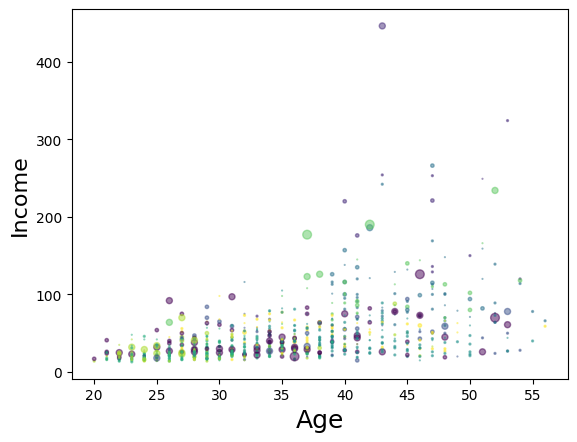

In [131]:
area = np.pi * ( x_s[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


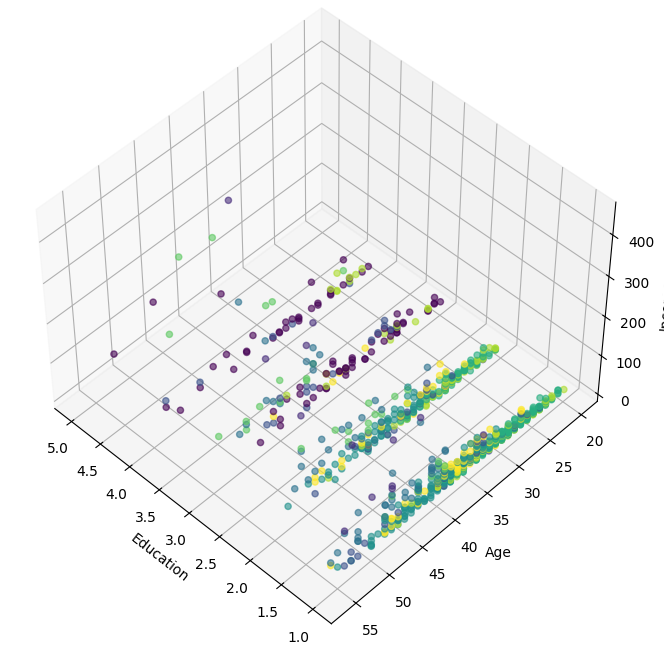

In [135]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)

# تنظیم برچسب‌های محورها
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

# رسم نقاط در فضای سه‌بعدی
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(np.float64), alpha=0.6)

plt.show()


# Hierarchical

In [65]:
data = 'https://raw.githubusercontent.com/erfanyou/machine_learning_with_python_jadi/refs/heads/main/cars_clus.csv'
car_df=pd.read_csv(data)

In [66]:
car_df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [67]:
car_df.info()
car_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


,partition
count,159.000000
mean,0.012579
std,0.111799
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [71]:
car_df=car_df[['sales', 'resale', 'type', 'price', 'engine_s',
    'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
    'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

In [72]:
car_df = car_df.apply(pd.to_numeric, errors='coerce')
car_df.dropna()
car_df = car_df.reset_index(drop=True)
car_df['kml'] = 236.25 / car_df['mpg']

In [73]:
car_df.head()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,kml
0,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,8.437500
1,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,9.450000
2,14.114,18.225,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,9.086538
3,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,10.738636
4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,8.750000


In [74]:

featureset = car_df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
feature.head()

,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,kml
0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,8.437500
1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,9.450000
2,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,9.086538
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,10.738636
4,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,8.750000


missing data
price       2
engine_s    1
horsepow    1
wheelbas    1
width       1
length      1
curb_wgt    2
fuel_cap    1
kml         3
dtype: int64


duplicates data
0






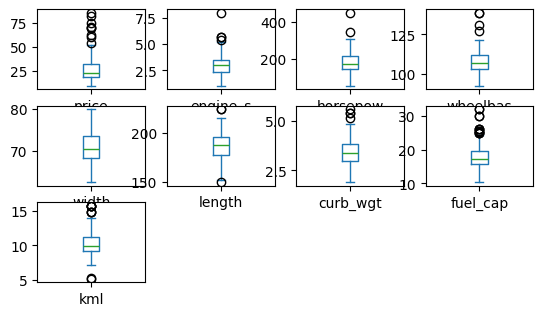

In [75]:
print('missing data')
missing_data = feature.isnull().sum()
print(missing_data)

print('\n'*1)
print('duplicates data')
duplicates = feature.duplicated()
print(duplicates.sum())

print('\n'*1)
feature.dtypes

print('\n')
feature.plot( kind='box', subplots=True , layout= (4,4) , sharex=False , sharey=False)
plt.show()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'engine_s'}>,
        <Axes: title={'center': 'horsepow'}>],
       [<Axes: title={'center': 'wheelbas'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'curb_wgt'}>,
        <Axes: title={'center': 'fuel_cap'}>,
        <Axes: title={'center': 'kml'}>]], dtype=object)

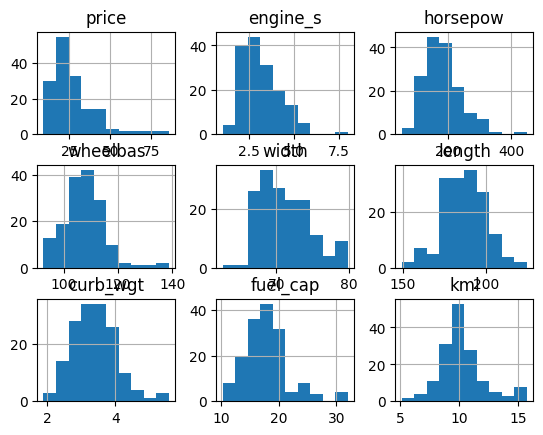

In [76]:
feature.hist()

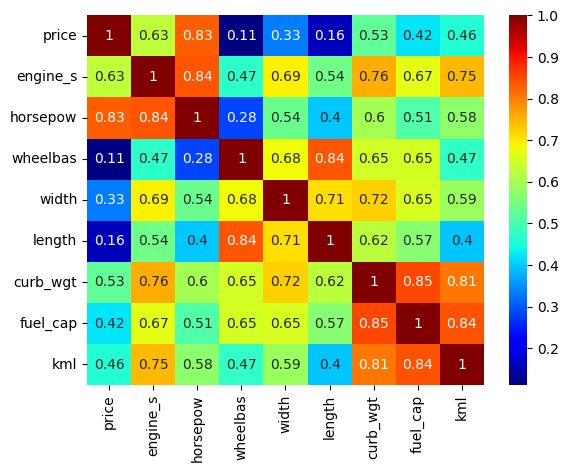

In [77]:
correlation = feature.corr()

sns.heatmap(data=correlation , annot=True, cmap='jet')
plt.show()

In [78]:
#sns.pairplot(feature)


In [79]:
from sklearn.preprocessing import MinMaxScaler

x=feature.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx

array([[0.16082082, 0.11428571, 0.21518987, ..., 0.20233886, 0.13364055,
        0.31105991],
       [0.25129483, 0.31428571, 0.43037975, ..., 0.44112048, 0.31797235,
        0.40645161],
       [       nan, 0.31428571, 0.43037975, ..., 0.42833832, 0.31797235,
        0.37220844],
       ...,
       [0.35094735, 0.27142857, 0.36962025, ..., 0.46369323, 0.49769585,
        0.44354839],
       [0.16082082, 0.07142857, 0.05316456, ..., 0.28202339, 0.07373272,
        0.        ],
       [0.32734544, 0.35714286, 0.2835443 , ..., 0.71063367, 0.31797235,
        0.37220844]])

In [80]:
import numpy as np
from scipy.spatial import distance

feature_mtx = np.nan_to_num(feature_mtx, nan=0.0, posinf=0.0, neginf=0.0)

length = feature_mtx.shape[0]
D = np.zeros((length, length))

for i in range(length):
    for j in range(length):
        D[i][j] = distance.euclidean(feature_mtx[i], feature_mtx[j])

In [81]:
import pylab
from scipy.cluster import hierarchy

Z = hierarchy.linkage(D, 'complete')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17860\3477849683.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [82]:
car_df.columns

Index(['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas',
       'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales', 'kml'],
      dtype='object')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [31.25, 31.25, 80.0, 80.0],
  [5.0, 5.0, 55.625, 55.625],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [123.75, 123.75, 170.0, 170.0],
  [105.0, 105.0, 146.875, 146.875],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [212.5, 212.5, 240.0, 240.0],
  [195.0, 195.0, 226.25, 226.25],
  [125.9375, 125.9375, 210.625, 210.625],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [271.25, 271.25, 320.0, 320.0],
  [168.281

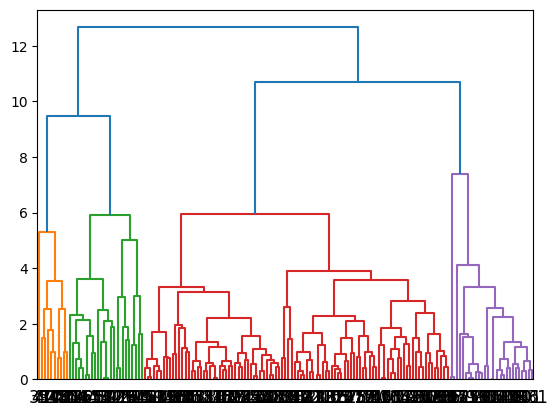

In [88]:
import scipy.cluster.hierarchy as hierarchy

car_df = np.nan_to_num(car_df, nan=0.0, posinf=0.0, neginf=0.0)
car_df = pd.DataFrame(car_df)

dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')
dendro

In [90]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.56707373 0.56634839 ... 0.68510184 0.38655658 0.82230252]
 [0.56707373 0.         0.25613859 ... 0.25238738 0.73294237 0.43377934]
 [0.56634839 0.25613859 0.         ... 0.42419714 0.72284334 0.53590938]
 ...
 [0.68510184 0.25238738 0.42419714 ... 0.         0.83045209 0.382288  ]
 [0.38655658 0.73294237 0.72284334 ... 0.83045209 0.         0.87177549]
 [0.82230252 0.43377934 0.53590938 ... 0.382288   0.87177549 0.        ]]


In [91]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17860\1633147189.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


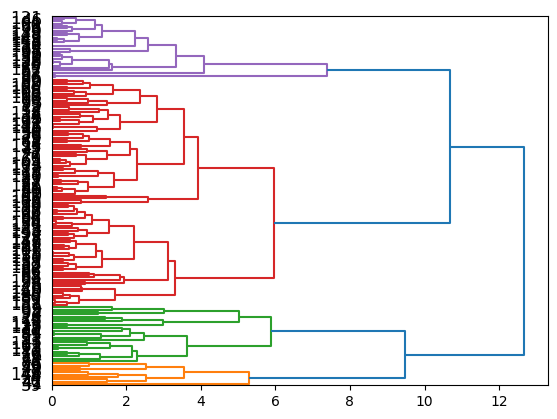

In [96]:
def llf(id):
    return '[%s %s %s]' % (car_df['manufact'][id], car_df['model'][id], int(float(car_df['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_rotation=0, leaf_font_size =12, orientation = 'right')


# DBSCN

In [97]:
data = 'https://raw.githubusercontent.com/erfanyou/machine_learning_with_python_jadi/refs/heads/main/weather-stations20140101-20141231.csv'
we_df = pd.read_csv(data)
we_df

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,NAIN A,56.550,-61.683,NL,-22.6,0.0,-5.2,-6.8,0.0,-33.5,...,0.0,66.0,74.0,5.0,NaN,NaN,NaN,1136.5,0.0,8502800
1337,NAIN A,56.551,-61.682,NL,-19.2,24.0,NaN,-7.5,17.0,NaN,...,17.0,NaN,NaN,4.0,NaN,NaN,NaN,148.7,0.0,8502801
1338,SAGLEK,58.333,-62.586,NL,-24.4,2.0,NaN,-13.5,1.0,-32.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.2,0.0,8503249
1339,TUKIALIK BAY,54.716,-58.358,NL,-22.8,2.0,NaN,-5.8,1.0,-32.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,0.0,8503992


missing data
Stn_Name    1341
Lat            0
Long           0
Prov        1341
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No       130
dtype: int64


duplicates data
0






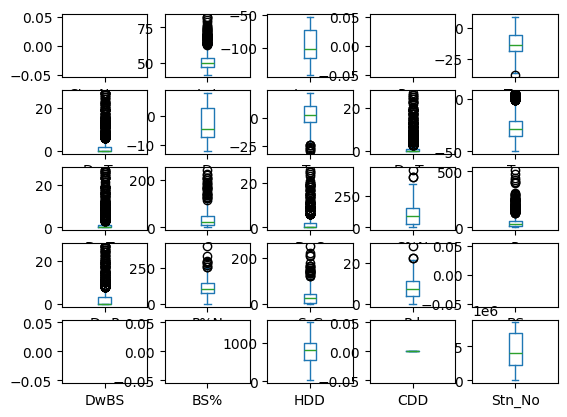

[]


In [104]:

missing_data = we_df.isnull().sum()
if missing_data>200:
    l.append(missing_data.)
print(missing_data)

print('\n'*1)
print('duplicates data')
duplicates = we_df.duplicated()
print(duplicates.sum())

we_df = we_df.apply(pd.to_numeric, errors='coerce')
we_df.dropna()
we_df = we_df.reset_index(drop=True)

print('\n'*1)
we_df.dtypes

print('\n')
we_df.plot( kind='box', subplots=True , layout= (5,5) , sharex=False , sharey=False)
plt.show()

we_df.shape
print(l)

In [ ]:

we_df= we_df.drop(columns=[Stn_Name,Prov,P%N,BS	,BS%,], axis=1)
we_df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,NaN,48.935,-123.742,NaN,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500.0
1,NaN,48.824,-124.133,NaN,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040.0
2,NaN,48.829,-124.052,NaN,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055.0
3,NaN,48.425,-123.226,NaN,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475.0
4,NaN,48.735,-123.728,NaN,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573.0
